In [10]:
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
import sys
from scipy.interpolate import griddata
from tqdm import tqdm

# sys.path.append('/Users/jiarong/Google Drive/codes/jiarongw-postprocessing/functions')
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')

import csv
from fio import readin
from visualization import contour_generator
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/pof.mplstyle')

In [5]:
s10_spec1 = pd.read_csv('data/matlab/s10_spec1.csv', delimiter = ',')
# names=['S','k','B_saturation']

In [7]:
def steepness_trunc (F,k):
    mu = np.zeros(len(k))
    dk = k[1]-k[0]
    for i,k_ in enumerate(k):
        mu[i] = np.sum(k[:i]**2*F[:i]*dk)
    return mu

In [62]:
def steepness_trunc_non_uniform (F,k):
    mu = np.zeros(len(k))
    Hs = np.zeros(len(k))
    dk = np.roll(k, -1) - k
    dk = np.array(dk); dk[-1]=0
    for i,k_ in enumerate(k):
        mu[i] = np.sum(k[:i]**2*F[:i]*dk[:i])
        Hs[i] = np.sum(F[:i]*dk[:i])**0.5
    return mu, Hs

[3.39063207e-04 1.01718962e-03 1.69531603e-03 ... 7.38140601e-01
 7.38818728e-01 0.00000000e+00]


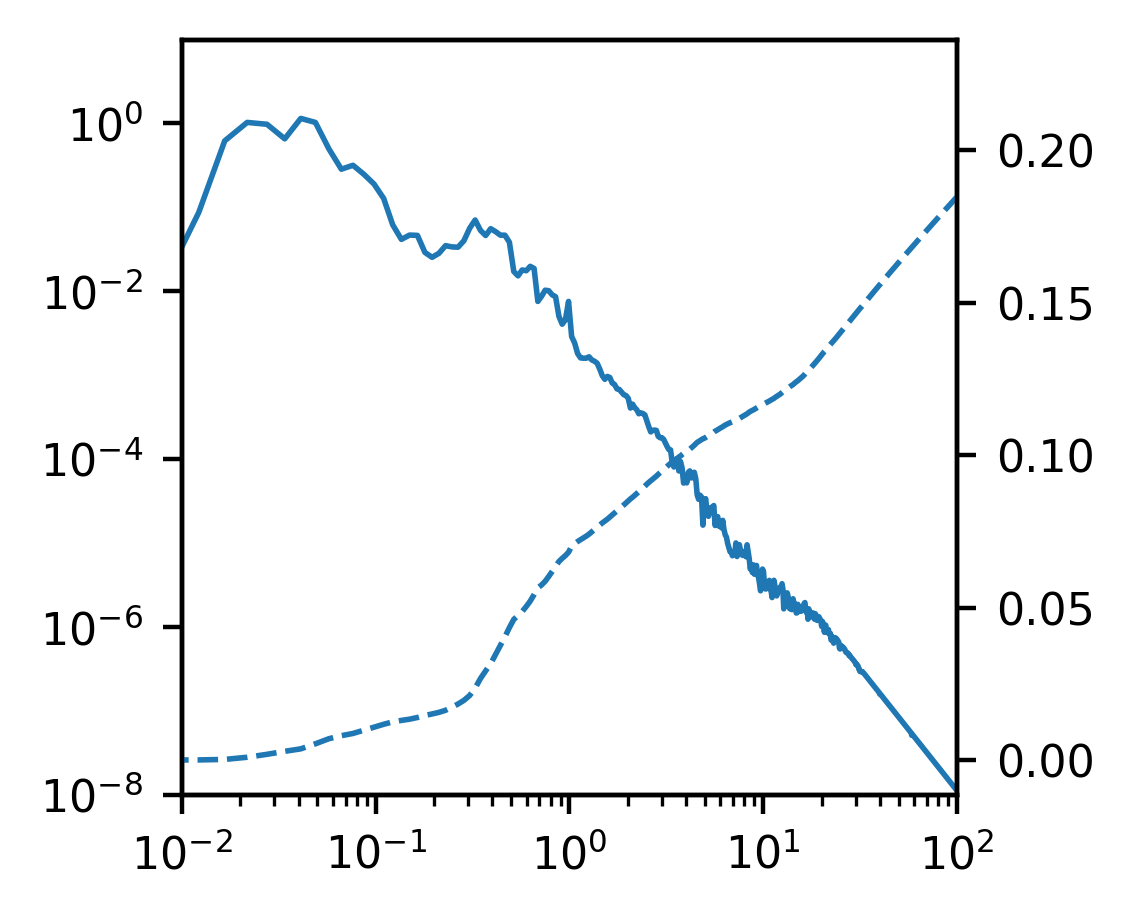

In [58]:
fig = plt.figure(figsize = [2.5,2.5]); ax = plt.gca()
ax2 = ax.twinx()
mu, Hs = steepness_trunc_non_uniform (s10_spec1.S, s10_spec1.k)
ax.plot(s10_spec1.k[1:], s10_spec1.S[1:], c='C0', lw=1)
ax2.plot(s10_spec1.k[1:], mu[1:]**0.5, '--',  c='C0', lw=1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.01,100])
ax.set_ylim([10**(-8.),10**(1.)])
Hs = np.sum(s10_spec1.S*s10_spec1.k[1:])
# ax2.set_ylim([0,0.5])

Text(0, 0.5, '$\\mu(k)$')

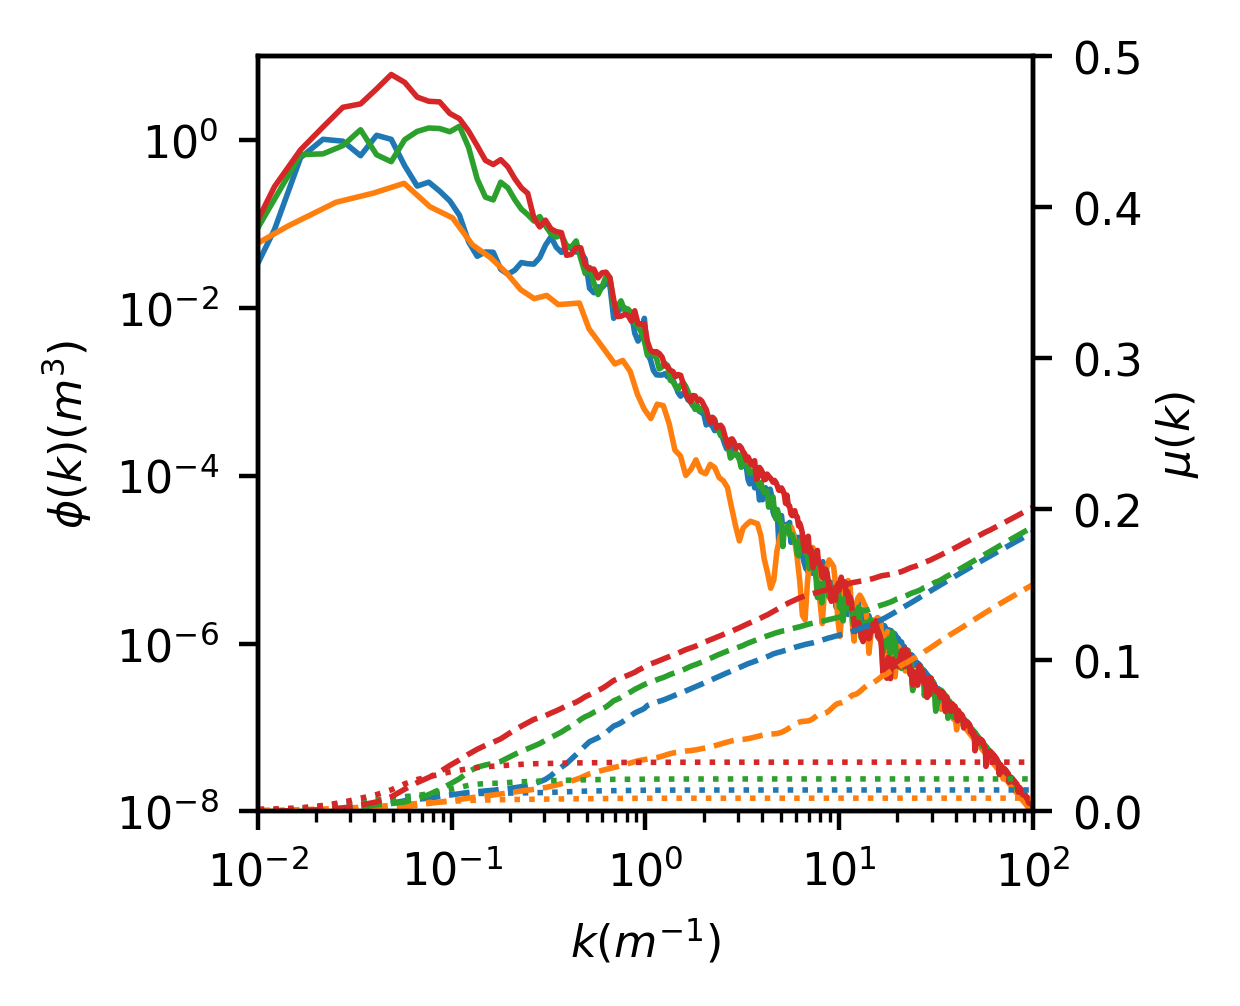

In [65]:
fig = plt.figure(figsize = [2.5,2.5]); ax = plt.gca()
ax2 = ax.twinx()

s10_spec1 = pd.read_csv('data/matlab/s10_spec1.csv', delimiter = ',')
mu, Hs = steepness_trunc_non_uniform (s10_spec1.S, s10_spec1.k)
ax.plot(s10_spec1.k[1:], s10_spec1.S[1:], c='C0', lw=1)

ax.axvline(x=0.22058956)
ax2.plot(s10_spec1.k[1:], mu[1:]**0.5, '--',  c='C0', lw=1)
ax2.plot(s10_spec1.k[1:], Hs[1:]*0.05, ':',  c='C0', lw=1)

s10_spec39 = pd.read_csv('data/matlab/s10_spec39.csv', delimiter = ',')
mu, Hs = steepness_trunc_non_uniform (s10_spec39.S, s10_spec39.k)
ax.plot(s10_spec39.k[1:], s10_spec39.S[1:], c='C1', lw=1)
ax2.plot(s10_spec39.k[1:], mu[1:]**0.5, '--',  c='C1', lw=1)
ax2.plot(s10_spec39.k[1:], Hs[1:]*0.05, ':',  c='C1', lw=1)

r09_spec1 = pd.read_csv('data/matlab/r09_spec1.csv', delimiter = ',')
mu,Hs = steepness_trunc_non_uniform (r09_spec1.S, r09_spec1.k)
ax.plot(r09_spec1.k[1:], r09_spec1.S[1:], c='C2', lw=1)
ax2.plot(r09_spec1.k[1:], mu[1:]**0.5, '--',  c='C2', lw=1)
ax2.plot(r09_spec1.k[1:], Hs[1:]*0.05, ':',  c='C2', lw=1)

r09_spec25 = pd.read_csv('data/matlab/r09_spec25.csv', delimiter = ',')
mu, Hs = steepness_trunc_non_uniform (r09_spec25.S, r09_spec25.k)
ax.plot(r09_spec25.k[1:], r09_spec25.S[1:], c='C3', lw=1)
ax2.plot(r09_spec25.k[1:], mu[1:]**0.5, '--',  c='C3', lw=1)
ax2.plot(r09_spec25.k[1:], Hs[1:]*0.05, ':',  c='C3', lw=1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.01,100])
ax.set_ylim([10**(-8.),10**(1.)])
Hs = np.sum(s10_spec1.S*s10_spec1.k[1:])
ax2.set_ylim([0,0.5])
ax.set_ylabel('$\phi(k)(m^3)$')
ax.set_xlabel('$k(m^{-1})$')
ax2.set_ylabel('$\mu(k)$', labelpad=2)